In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_max = 200
y_max = 100

A = [0,0]
B = [0,y_max]
C = [x_max, 0]
Cp = [70, 30]  # Center Point

In [3]:
ab = B[1] - A[1]
ac = C[0] - A[0]

theta_b = np.arctan(Cp[0]/(ab-Cp[1]))
theta_a = np.arctan(Cp[1]/Cp[0])
theta_c = np.arctan(Cp[1]/(ac-Cp[0]))

bc = ac / np.sin(theta_b)
l_total = ab + ac + bc
l_BCp = (ab-Cp[1])/np.cos(theta_b)

In [4]:
l_BCp

98.99494936611664

In [5]:
s_set = [5, 10, 20, 35]
N = [50, 30, 20, 20, 10]

s_b = [i * np.sin(theta_b) for i in s_set]
s_a = [i * np.tan(theta_a) for i in s_b]
s_c = [i / np.tan(theta_c) for i in s_a]

In [6]:
def get_new_triangle(A, B, C, s_a, s_b, s_c, s_set):
    
    delta_b = s_set * np.cos(theta_b)
    delta_c = s_a
    delta_a = s_b
    
    A1 = [(A[0]+delta_a), (A[1]+s_a)]
    B1 = [(B[0]+s_b), (B[1]-delta_b)]
    C1 = [(C[0]-s_c), (C[1]+delta_c)]
    
    return A1, B1, C1

In [7]:
def get_side_line(B, C):
    # Calculate the coefficients
    x = [B[0], C[0]]
    y = [B[1], C[1]]
    coefficients = np.polyfit(x, y, 1)
    
    a = coefficients[0] # Zero Order, Constant Term
    b = coefficients[1] # First Order, Gradient
    co = [a, b]
    return co

In [8]:
def get_points(A, B, C, N):
    store = []
    
    Nb = int(N * ac / l_total)
    Nc = int(N * ab / l_total)
    Na = N - Nb - Nc
    
    # On line AB, # of points = Nc
    delta_ab = (B[1] - A[1]) / (Nc + 1)
    d1 = 0
    for i in range(Nc):
        d1 = d1 + delta_ab
        store.append([A[0], (A[1] + d1)])

    # On line AC, # of points = Nb
    delta_ac = (C[0] - A[0]) / (Nb + 1)
    d2 = 0
    for i in range(Nb):
        d2 = d2 + delta_ac
        store.append([(A[0] + d2), A[1]])

    # On line BC, # of points = Na
    co = get_side_line(B, C)
    delta_x = (C[0] - B[0]) / (Na + 1)   # Increment along x direction
    d3 = B[0]
    for i in range(Na):
        d3 = d3 + delta_x
        store.append([d3, (co[0]*d3 + co[1])])
    
    # Coordinates
    store.extend([A, B, C])
    
    return store

In [9]:
pts=[]
for i in range(len(s_set)):
    A1, B1, C1 = get_new_triangle(A, B, C, s_a[i], s_b[i], s_c[i], s_set[i])   # return new_coor
    pts.extend(get_points(A1, B1, C1, N[i]))
    A, B, C = A1, B1, C1

<function matplotlib.pyplot.show(close=None, block=None)>

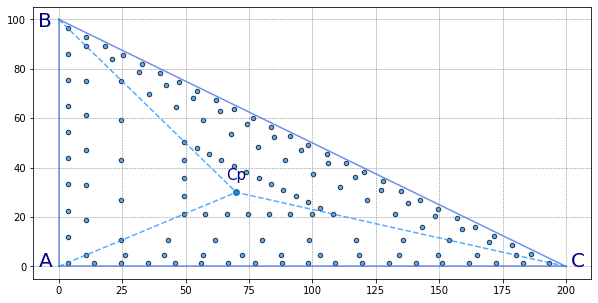

In [10]:
# Visualize
pts = np.array(pts)
x1 = pts[:,0]
y1 = pts[:,1]

plt.figure(figsize=(10,5))
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.plot((0, 0), (0, y_max), scaley = False,c='royalblue',alpha = 0.75)
plt.plot((x_max, 0),(0, 0),scaley = False,c='royalblue',alpha = 0.75)
plt.plot((0, x_max), (y_max, 0), scaley = False,c='royalblue',alpha = 0.75)

plt.scatter(x1,y1,s=20,c='dodgerblue',edgecolor = 'black',alpha = 0.75)
plt.scatter(Cp[0], Cp[1])
         
# Plot Vertices - Cp
plt.plot([0, Cp[0]], [0, Cp[1]], 'dodgerblue', linestyle="--", alpha = 0.75)
plt.plot([0, Cp[0]], [y_max, Cp[1]], 'dodgerblue', linestyle="--", alpha = 0.75)
plt.plot([x_max, Cp[0]], [0, Cp[1]], 'dodgerblue', linestyle="--", alpha = 0.75)

# Add Text
plt.rcParams.update({'font.size': 10})
plt.text(0-8, 0, "A", fontsize=20, color='darkblue')
plt.text(0-8, y_max-3, "B", fontsize=20, color='darkblue')
plt.text(x_max+2, 0, "C", fontsize=20, color='darkblue')
plt.text(Cp[0]-4, Cp[1]+5, "Cp", fontsize=15, color='darkblue')

plt.show()